# MNE-Python : Des données brutes aux époques et réponses évoquées (ERF/ERP)

`Source du code : Alexandre Gramfort, Denis A. Engemann, Jona Sassenhagen et Richard Höchenberger
 Modifié par Annalisa Pascarella, Vanessa Hadid`



In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



## Charger le package mne



In [2]:
import mne
print(mne.__version__)


1.9.0



Définissons le niveau de journalisation à 'warning' pour que la sortie soit moins verbeuse (moins de texte)



In [3]:
mne.set_log_level('warning')



## Télécharger le jeu de données exemple

Maintenant, on importe le jeu de données [`sample`](https://mne.tools/stable/documentation/datasets.html#sample-dataset). Il sera téléchargé automatiquement (environ 2 Go).



In [4]:
from mne.datasets import sample
data_path = sample.data_path()

raw_fname = os.path.join(data_path, 'MEG/sample/sample_audvis_filt-0-40_raw.fif')
print(raw_fname)


/home/hyruuk/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif



## Lire les données à partir du fichier

Pour voir ce que fait une fonction... utilisez cette notation !



In [5]:
mne.io.read_raw_fif?


Signature:
mne.io.read_raw_fif(
    fname,
    allow_maxshield=False,
    preload=False,
    on_split_missing='raise',
    verbose=None,
) -> mne.io.fiff.raw.Raw
Docstring:
Reader function for Raw FIF data.

Parameters
----------
fname : path-like | file-like
    The raw filename to load. For files that have automatically been split,
    the split part will be automatically loaded. Filenames should end
    with raw.fif, raw.fif.gz, raw_sss.fif, raw_sss.fif.gz, raw_tsss.fif,
    raw_tsss.fif.gz, or _meg.fif. If a file-like object is provided,
    preloading must be used.

    .. versionchanged:: 0.18
       Support for file-like objects.
allow_maxshield : bool | str (default False)
    If True, allow loading of data that has been recorded with internal
    active compensation (MaxShield). Data recorded with MaxShield should
    generally not be loaded directly, but should first be processed using
    SSS/tSSS to remove the compensation signals that may also affect brain
    activity. Ca

In [6]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)
print(raw)


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MiB, data loaded>



Si `preload=True`, les données seront préchargées en mémoire pour permettre la manipulation des données et une indexation plus rapide (nécessite une grande quantité de mémoire). Par défaut, les données ne seront pas chargées en mémoire.
    
L'affichage de l'objet [`Raw`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) montre quelques informations de base comme le nombre total de canaux, le nombre de points temporels auxquels les données ont été échantillonnées, la durée totale et la taille approximative en mémoire.


Examinons maintenant les informations de mesure stockées dans l'attribut `raw.info`. Il fournira des détails sur :

   - la fréquence d'échantillonnage
   - les paramètres de filtrage
   - les types de canaux disponibles
   - les mauvais canaux
   - etc.



In [7]:
print(raw.info)


<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>



`raw.info` est simplement un dictionnaire et comme les dictionnaires Python, il possède une méthode `.keys()` qui montre tous les noms de champs disponibles



In [8]:
isinstance(raw.info, dict)
print(raw.info.keys())


dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])



On peut accéder à ses éléments de cette façon :



In [9]:
raw.info['sfreq']  # Fréquence d'échantillonnage


150.15374755859375

In [10]:
raw.info['bads']  # liste des canaux marqués comme mauvais


['MEG 2443', 'EEG 053']


En examinant le dictionnaire info, nous observons que les données ont déjà été filtrées.

Maintenant, voyons quels canaux sont présents dans les données. Nous avons simplement à jeter un coup d'œil à l'attribut `raw.ch_names`.



In [11]:
raw.ch_names


['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',


Vous pouvez l'indexer comme une liste



In [12]:
raw.ch_names[42]


'MEG 0432'

In [13]:
raw.ch_names[:10]


['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']


Type d'un canal spécifique



In [14]:
mne.channel_type?


Signature: mne.channel_type(info, idx)
Docstring:
Get channel type.

Parameters
----------

info : mne.Info
    The :class:`mne.Info` object with information about the sensors and methods of measurement.
idx : int
    Index of channel.

Returns
-------
type : str
    Type of channel. Will be one of::

        {'bio', 'chpi', 'dbs', 'dipole', 'ecg', 'ecog', 'eeg', 'emg',
        'eog', 'exci', 'eyetrack', 'fnirs', 'gof', 'gsr', 'ias', 'misc',
        'meg', 'ref_meg', 'resp', 'seeg', 'stim', 'syst', 'temperature'}
File:      ~/GitHub/cocolab/mne_meeg_ml_main/env/lib/python3.10/site-packages/mne/_fiff/pick.py
Type:      function

In [15]:
channel_type = mne.channel_type(info=raw.info, idx=75)
print('Le canal #75 est de type:', channel_type)

channel_type = mne.channel_type(info=raw.info, idx=320)
print('Le canal #320 est de type:', channel_type)


Le canal #75 est de type: grad
Le canal #320 est de type: eeg



`raw.info['chs']` contient tous les détails sur les capteurs (type, emplacements, cadre de coordonnées, etc.)



In [16]:
len(raw.info['chs'])


376

In [17]:
type(raw.info['chs'])


list

In [18]:
raw.info['chs'][0]


{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 1.0,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [19]:
raw.info['chs'][330]


{'scanno': 331,
 'logno': 16,
 'kind': 2 (FIFFV_EEG_CH),
 'range': 1.0,
 'cal': 0.0001875000016298145,
 'coil_type': 1 (FIFFV_COIL_EEG),
 'loc': array([ 0.06725728,  0.05876905,  0.0723644 ,  0.00235201,  0.11096951,
        -0.03500458,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ]),
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'EEG 016',
 'coord_frame': 4 (FIFFV_COORD_HEAD)}


Il est possible de renommer des canaux en utilisant la méthode [`rename_channels()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.rename_channels)



In [20]:
raw.rename_channels({"EOG 061": "blink detector"})


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MiB, data loaded>


Pour visualiser les emplacements des capteurs, on peut utiliser la méthode [`plot_sensors()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot_sensors).



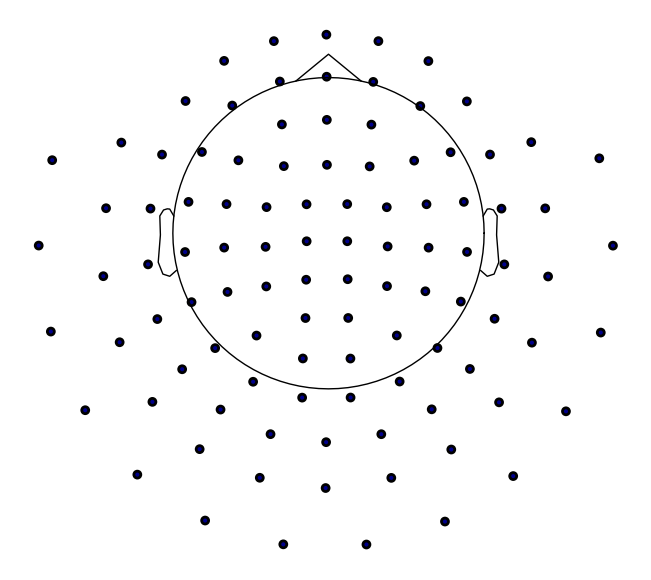

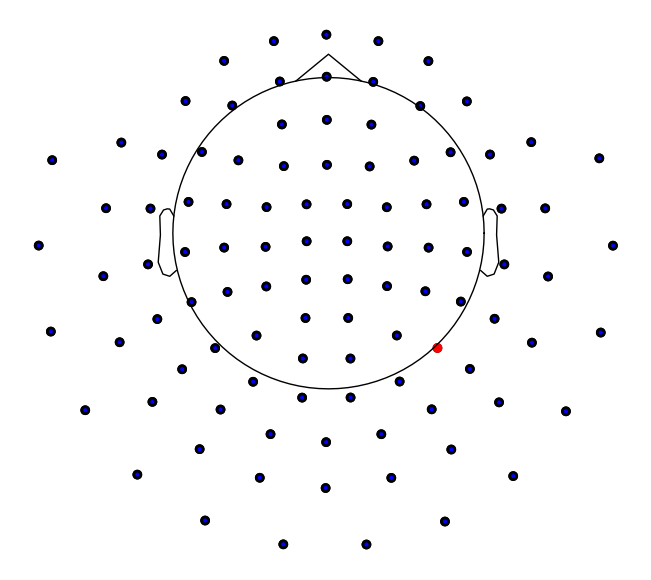

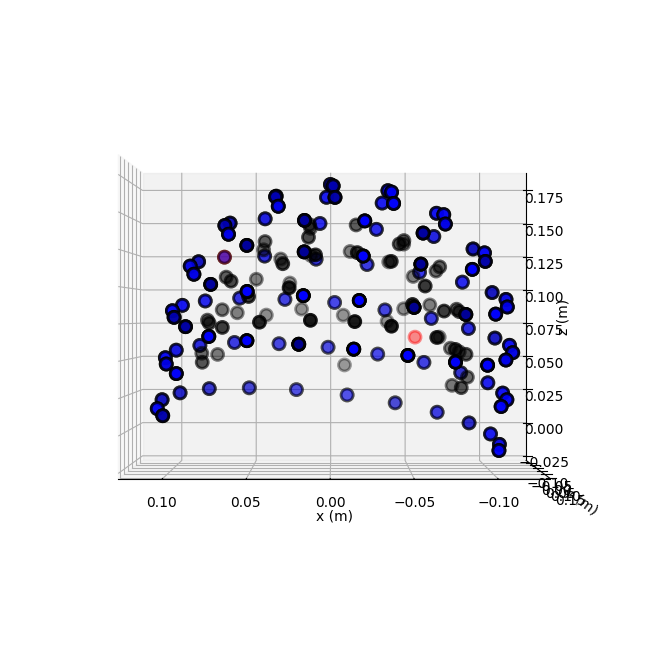

In [21]:
raw.plot_sensors(kind='topomap', ch_type='mag');  # topomap par défaut
raw.plot_sensors(ch_type='grad');
raw.plot_sensors(kind="3d", ch_type="all");



Le tutoriel [Travailler avec les emplacements de capteurs](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py) décrit comment lire et tracer les emplacements des capteurs, et comment MNE-Python gère les emplacements physiques des capteurs.

# Extraction de données à partir d'objets `Raw`

Pour accéder aux données, utilisez simplement la syntaxe `[]` comme pour accéder à n'importe quel élément d'une liste, d'un dictionnaire, etc. MNE-Python renvoie également un tableau de temps (en secondes) correspondant aux échantillons demandés.



In [22]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # récupère tous les canaux et les 10 premiers points temporels
print(data.shape)
print(times.shape)


(376, 10)
(10,)


In [23]:
times  # en secondes


array([0.        , 0.00665984, 0.01331968, 0.01997952, 0.02663936,
       0.0332992 , 0.03995904, 0.04661888, 0.05327872, 0.05993856])


Pour extraire des données dans une fenêtre temporelle donnée



In [24]:
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)


(array([[-1.20292928e-11, -9.85012327e-12, -6.24618310e-12,
        -5.81858254e-12, -8.26709172e-12, -9.47390603e-12,
        -8.40260120e-12, -7.93950648e-12, -8.96571088e-12,
        -8.95602112e-12, -7.15093074e-12, -6.00786247e-12,
        -6.54294063e-12, -6.84192232e-12, -5.98871103e-12,
        -5.25860162e-12, -4.93539186e-12, -3.89230469e-12,
        -2.65788192e-12, -3.34004505e-12, -6.19225374e-12,
        -9.04604833e-12, -1.01161679e-11, -9.28920758e-12,
        -7.37394236e-12, -6.03751556e-12, -7.31197351e-12,
        -1.09924238e-11, -1.36405519e-11, -1.24221320e-11,
        -9.01332828e-12, -7.46900280e-12, -9.03368340e-12,
        -1.14004407e-11, -1.23697337e-11, -1.16285216e-11,
        -9.52985206e-12, -7.14492118e-12, -7.11247777e-12,
        -1.09266820e-11, -1.54418731e-11, -1.58643113e-11,
        -1.23587284e-11, -9.66064248e-12, -1.00467018e-11,
        -1.12617940e-11, -1.16725618e-11, -1.23317045e-11,
        -1.31183629e-11, -1.20719410e-11, -9.88306477e-


Pour obtenir toutes les données, vous pouvez utiliser la méthode `get_data()`



In [25]:
data = raw.get_data()
print(data.shape)


(376, 41700)



# Visualisation des données brutes

Note : nous utiliserons le backend QT de matplotlib qui ouvrira une fenêtre séparée.



In [26]:
%matplotlib qt
fig = raw.plot()


In [27]:
raw.info['bads']


['MEG 2443', 'EEG 053']

In [28]:
fig = raw.copy().pick_types(meg=False, eeg=True).plot() # pour tracer uniquement les données EEG



# Filtrage



In [29]:
raw_beta = raw.copy().filter(l_freq=13, h_freq=30, verbose=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.019 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    0.5s finished


In [30]:
print(raw_beta.info)  # notez la mise à jour de raw.info['lowpass'] et raw.info['highpass']


<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 13.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 30.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


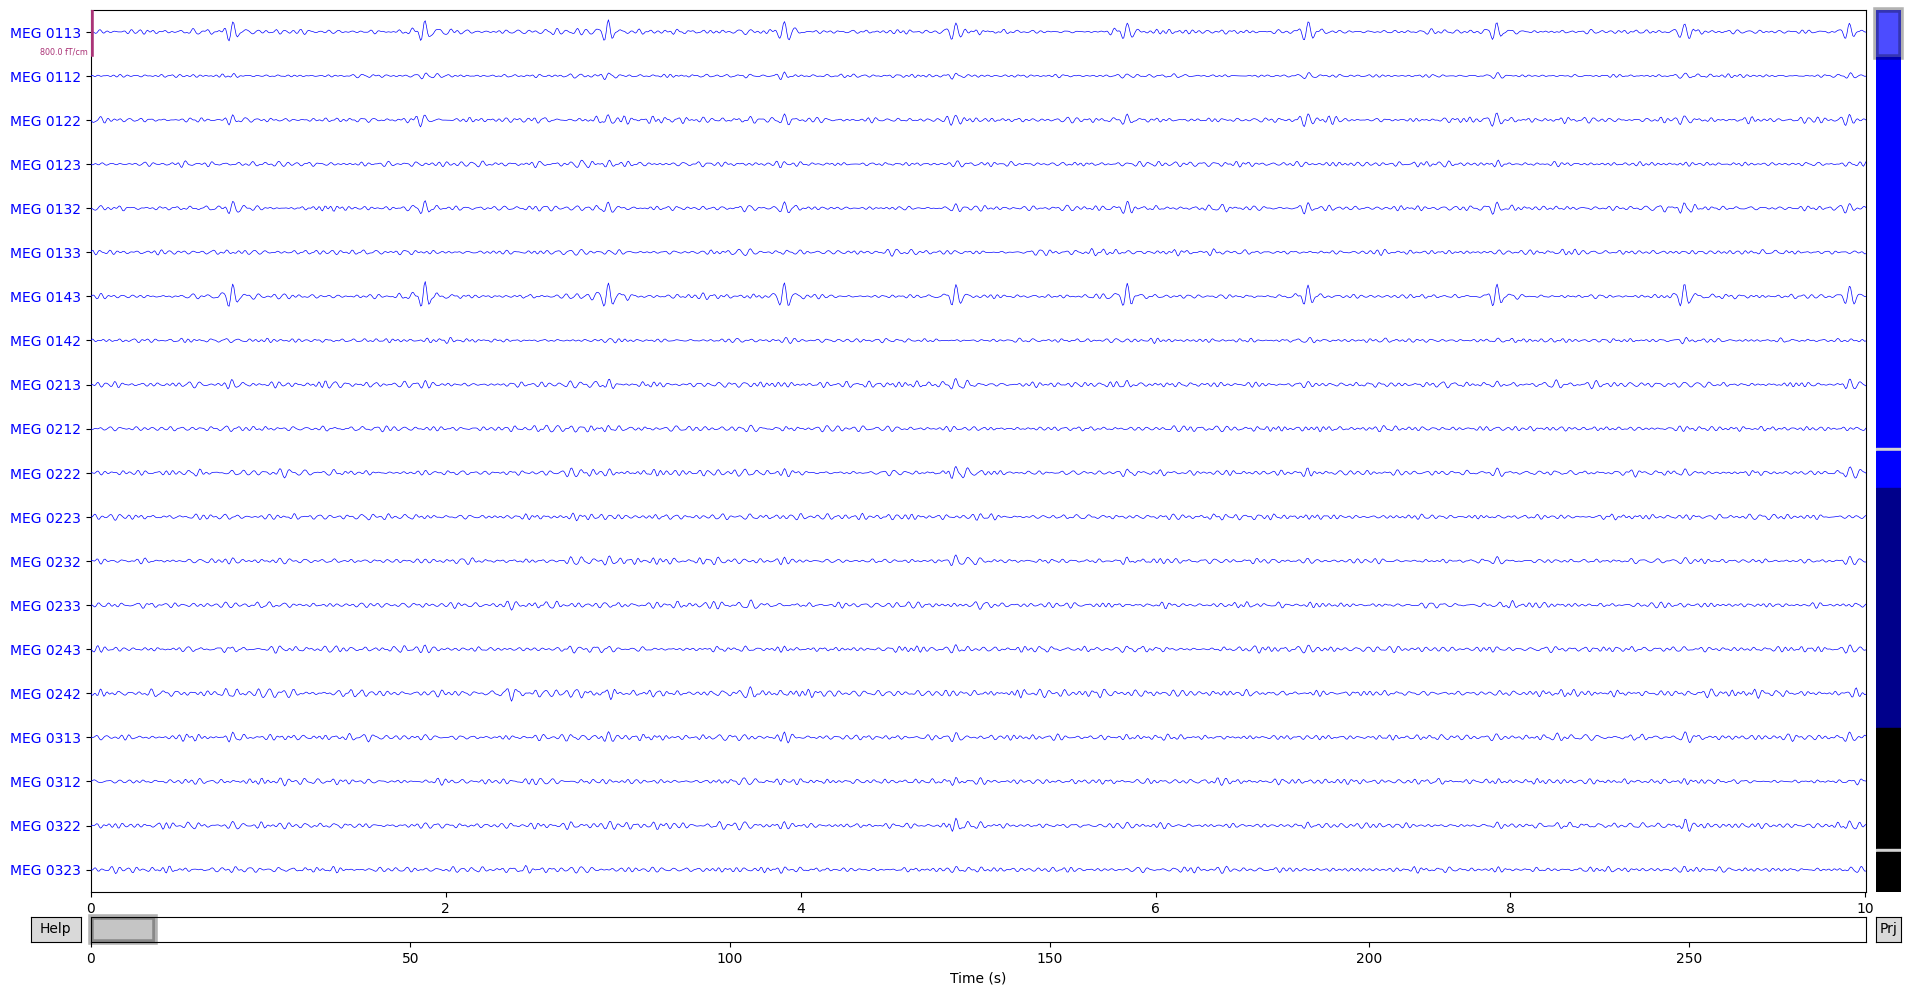

In [31]:
raw_beta.plot()


In [32]:
raw_beta.filter?


Signature:
raw_beta.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=None,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels/vertices.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types,


## Exercice
Tracez les 10 premières secondes du canal de stimulation `STI 014` en utilisant simplement matplotlib.

Conseils :

- Trouvez l'index du canal en utilisant `raw.ch_names.index('STI 014')`
- Obtenez les données pour ce canal
- Tracez-les en utilisant `plt.plot`


# Définir et lire des époques

Voyons maintenant comment les événements sont représentés et utilisés dans MNE.

## Tout d'abord, extraire les événements.
Le jeu de données [`sample`](https://mne.tools/stable/documentation/datasets.html#sample-dataset) inclut des événements expérimentaux enregistrés sur le canal de stimulation `STI 014`. Les événements sont analysés à partir de ce canal en utilisant la méthode [`mne.find_events()`](https://mne.tools/stable/generated/mne.find_events.html#mne.find_events) :



In [33]:
events = mne.find_events(raw, stim_channel='STI 014', verbose=True)
print(events.shape)
print(type(events))


319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
(319, 3)
<class 'numpy.ndarray'>



LA - 1 - Réponse à un stimulus auditif de l'oreille gauche  
RA - 2 - Réponse à un stimulus auditif de l'oreille droite  
LV - 3 - Réponse à un stimulus du champ visuel gauche  
RV - 4 - Réponse à un stimulus du champ visuel droit  
smiley - 5 - Réponse au visage souriant  
bouton - 32 - Réponse déclenchée par l'appui sur le bouton



In [34]:
print(events[:5])  # events est un tableau 2d, (temps, précédent, déclencheur)


[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]



Voir [`events`](https://mne.tools/stable/documentation/glossary.html#term-events) pour plus d'informations.



In [35]:
len(events[events[:, 2] == 4])


70

In [36]:
len(events)


319


## Tracer les événements



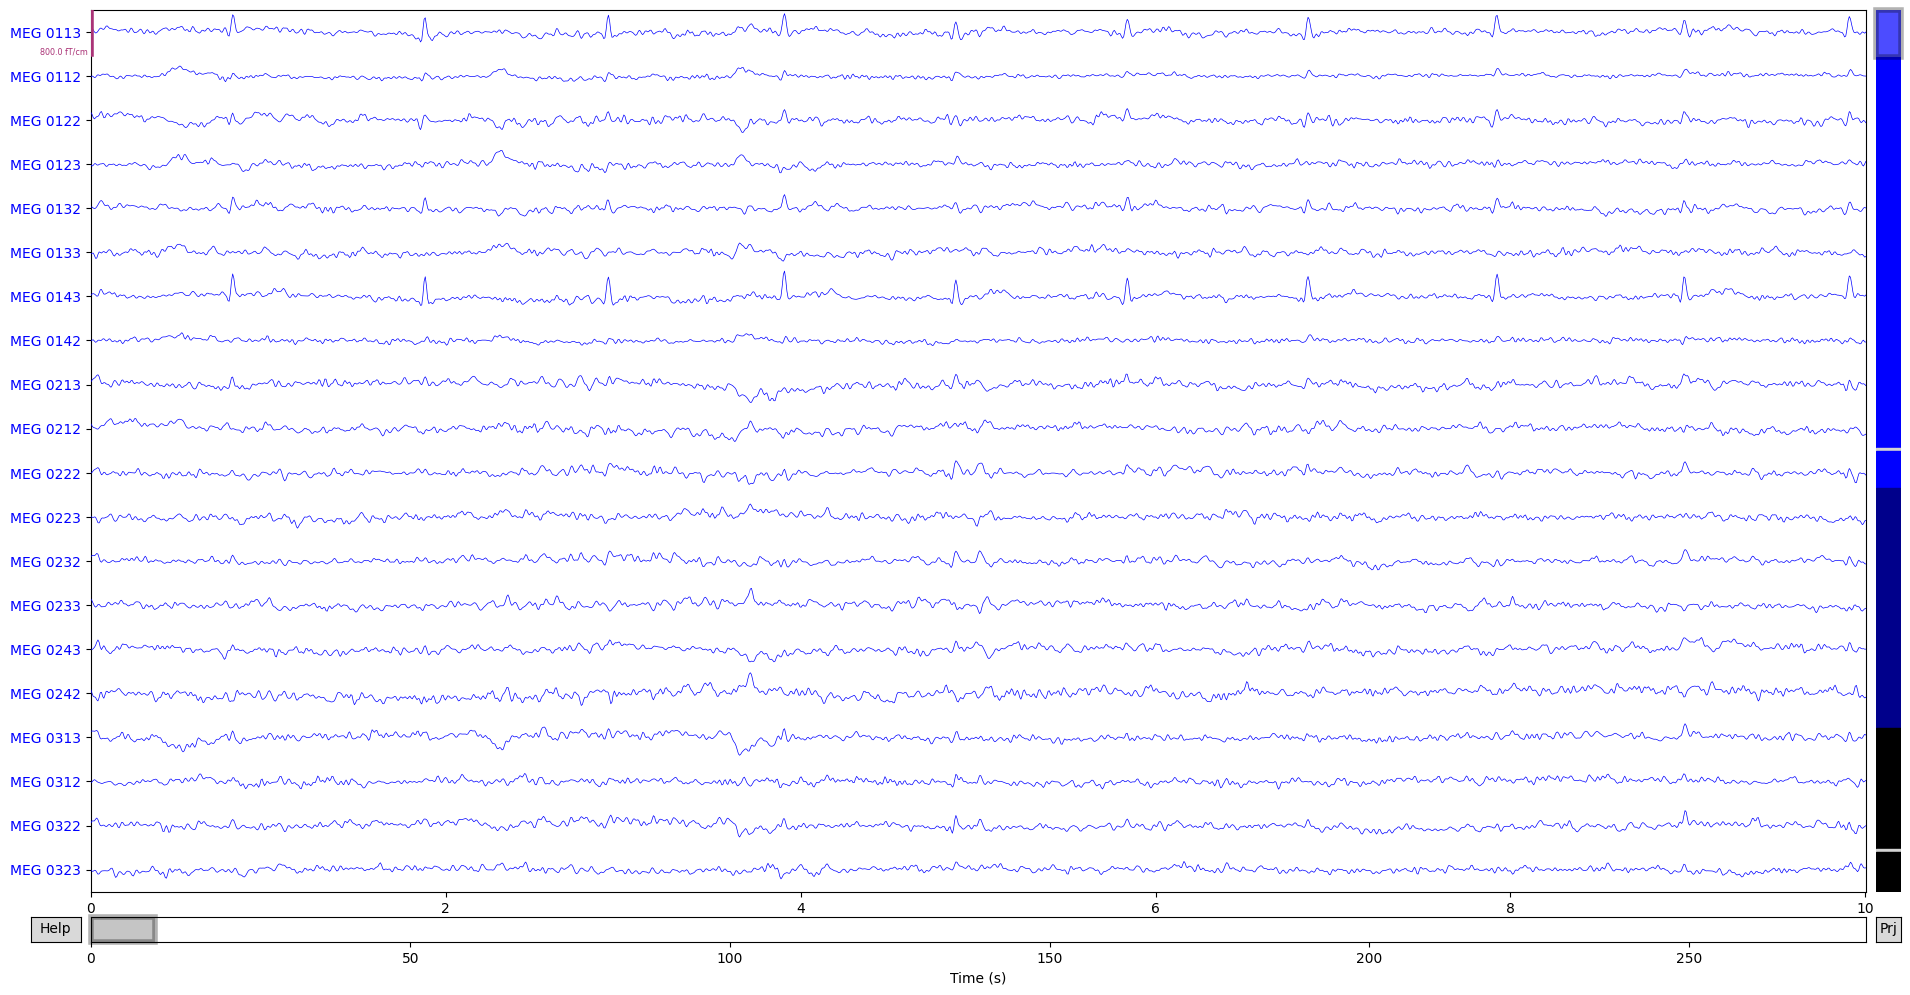

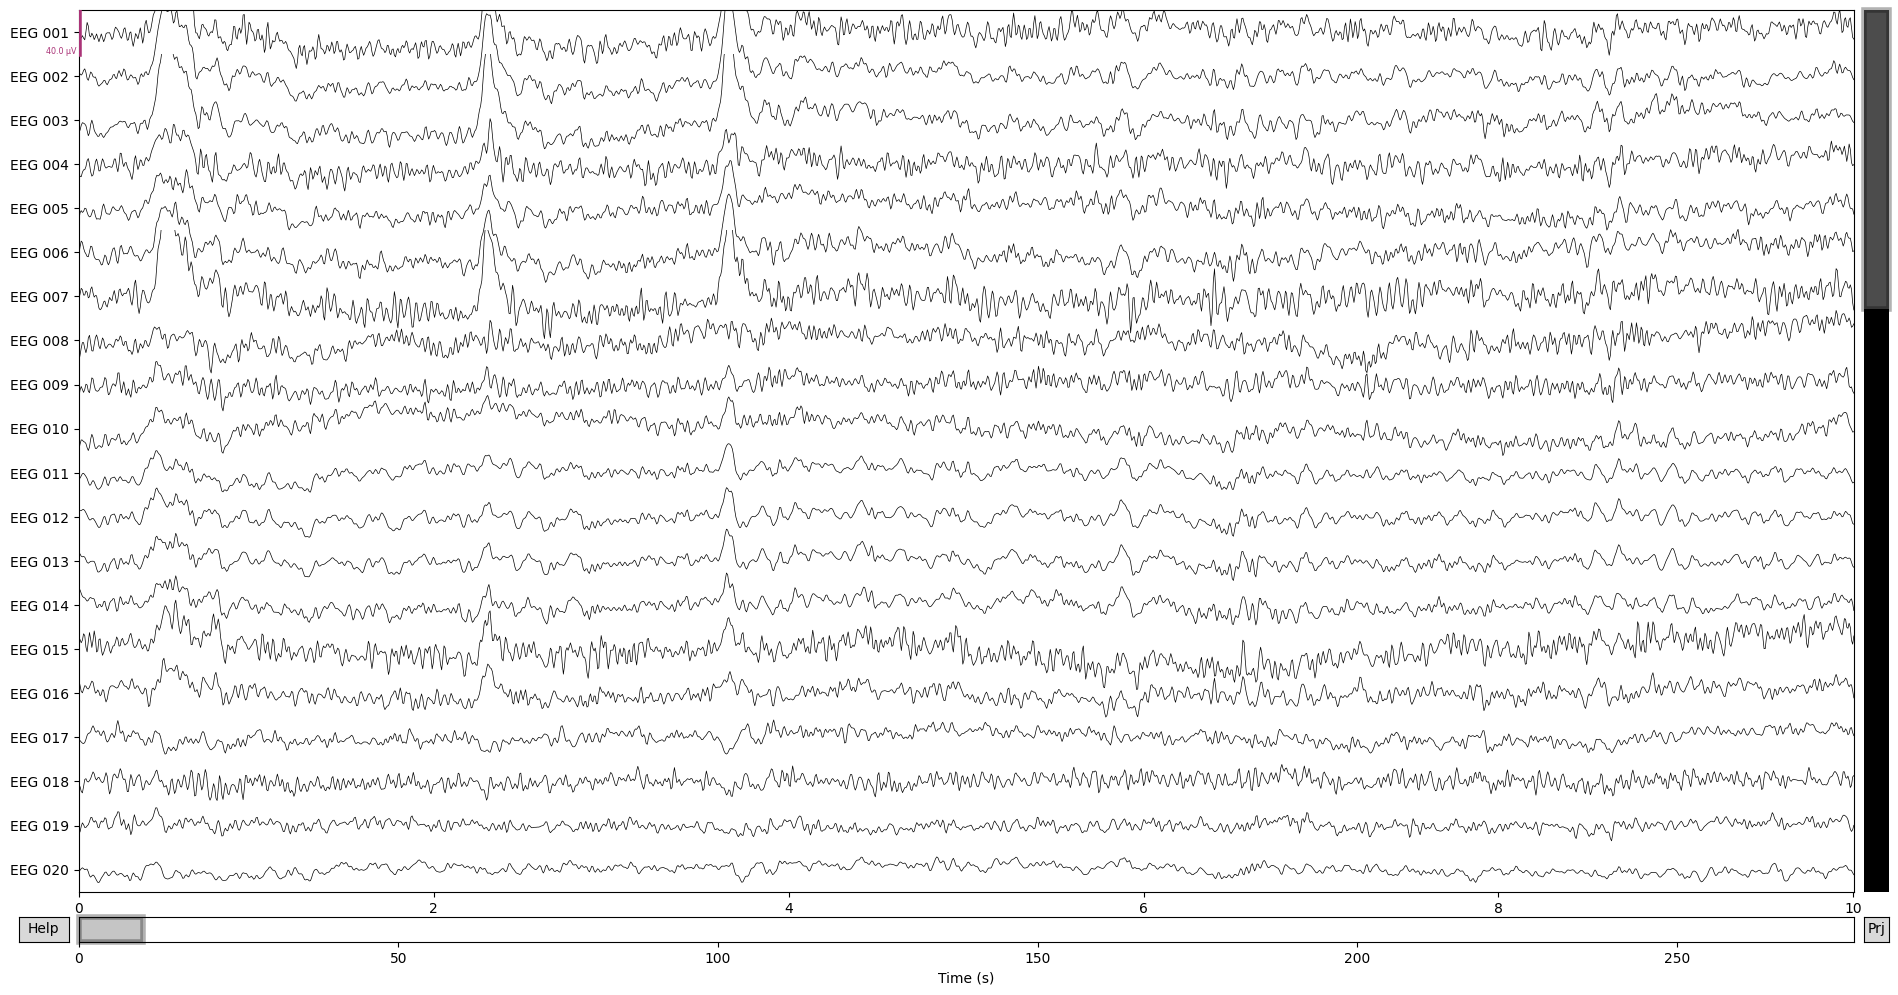

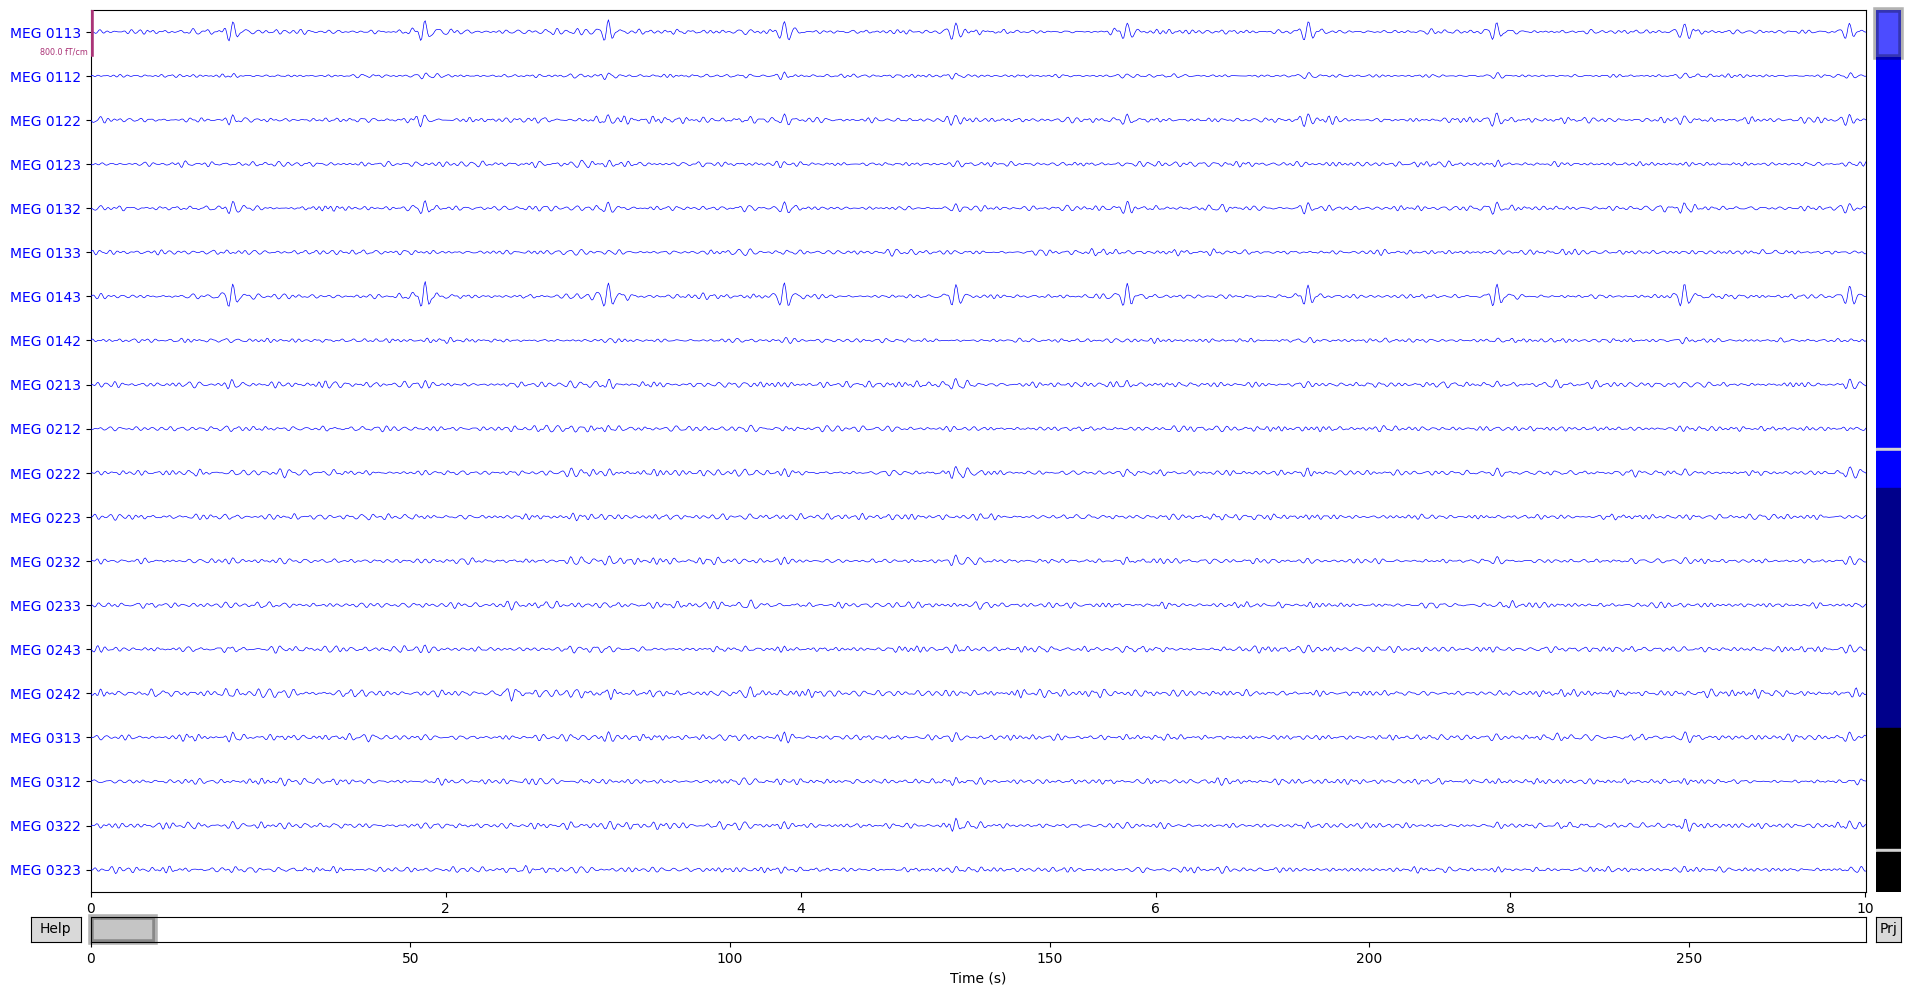

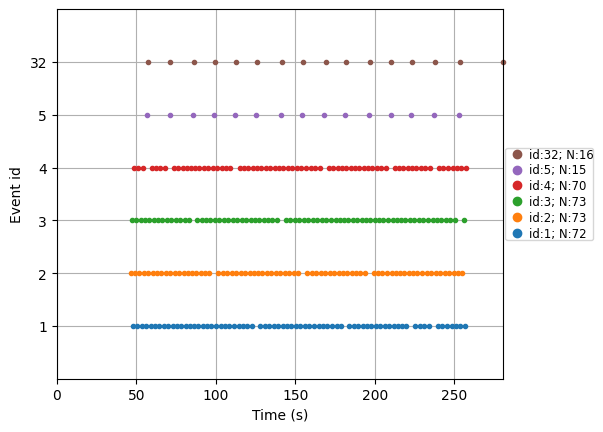

In [37]:
%matplotlib inline
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'])



Il est possible de créer un dictionnaire Python d'événements pour garder une trace de quel ID d'événement correspond à quelle condition expérimentale. Le dictionnaire sera utilisé pour extraire des époques à partir de données continues. Les clés du dictionnaire peuvent contenir `/` pour le regroupement de sous-conditions. Par exemple, si on veut regrouper tous les essais auditifs, au lieu de fusionner les ID d'événements 1 et 2 en utilisant la fonction `merge_events()`, on peut demander 'auditory' pour sélectionner toutes les époques avec les ID d'événements 1 et 2 ; demander les essais 'left' sélectionnera toutes les époques avec les ID d'événements 1 et 3.



/tmp/ipykernel_32865/4052666334.py:4: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id);
/tmp/ipykernel_32865/4052666334.py:4: RuntimeWarning: event 32 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id);


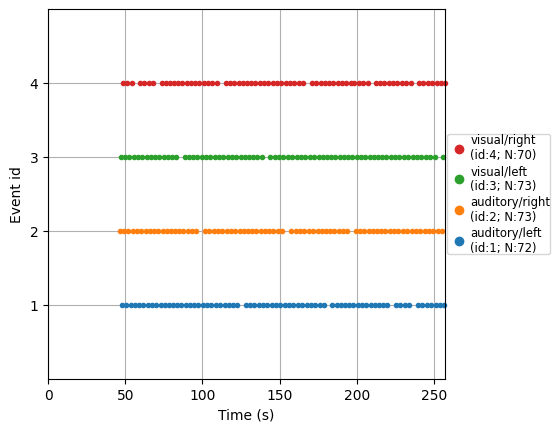

In [38]:
event_id = {"auditory/left": 1, "auditory/right": 2,
            "visual/left": 3, "visual/right": 4}

fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id);



Les événements peuvent être visualisés avec les données brutes :



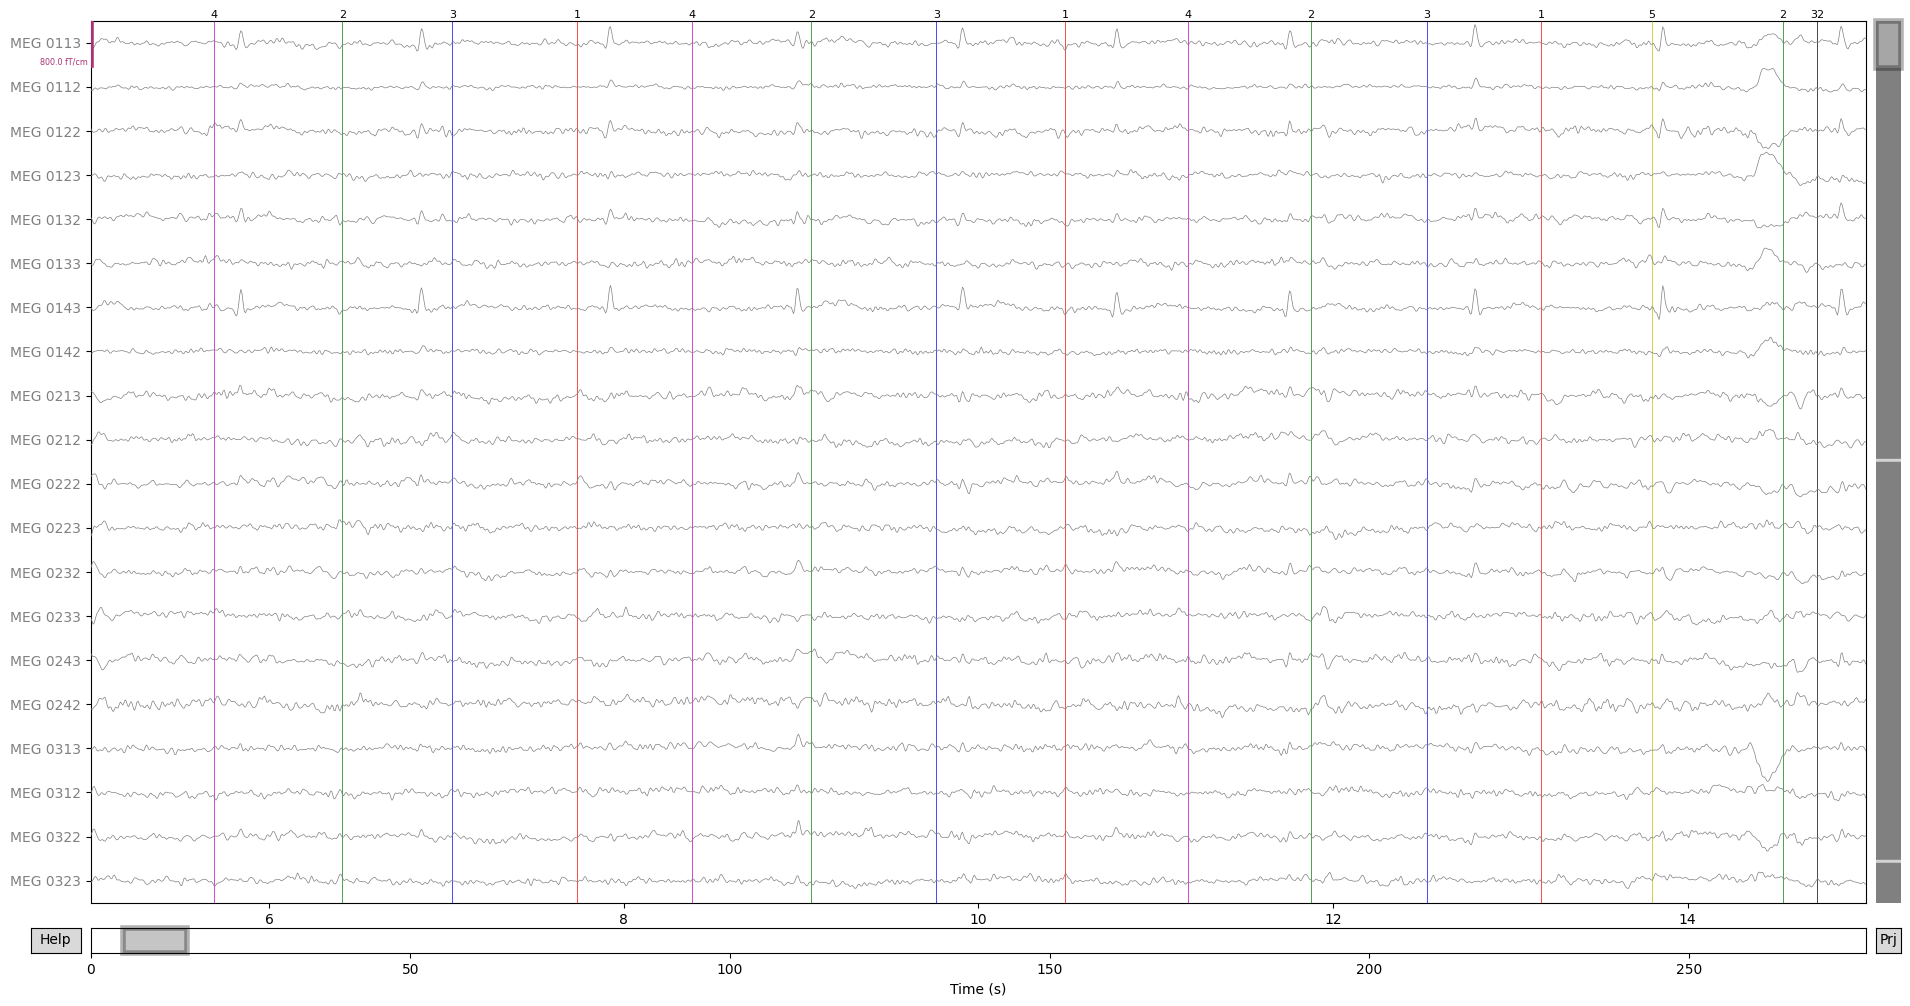

In [39]:
raw.plot(
    events=events,
    start=5,
    duration=10,
    color="gray",
    event_color={1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 32: "k"},
);



## Créer des époques

Dans MNE-Python, les objets [`Epochs`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs) sont une structure de données pour représenter et analyser des essais de durée égale du signal M/EEG. Les époques sont le plus souvent utilisées pour représenter des données qui sont verrouillées temporellement sur des événements expérimentaux répétés (tels que des débuts de stimulus ou des appuis sur un bouton par le sujet), mais peuvent également être utilisées pour stocker des trames séquentielles ou qui se chevauchent d'un signal continu (par exemple, pour l'analyse de l'activité au repos).  
À l'intérieur d'un objet Epochs, les données sont stockées dans un tableau de forme `(n_epochs, n_channels, n_times)`.

Tout d'abord, on définit les paramètres des époques : début, fin et période de base des époques.



In [40]:
tmin = -0.2  # début de chaque époque (200ms avant le déclencheur)
tmax = 0.5   # fin de chaque époque (500ms après le déclencheur)
baseline = (None, 0)  # du premier instant temporel jusqu'à l'impulsion de déclenchement



Définir les paramètres de rejet pic à pic (plage d'amplitude) pour les gradiomètres, magnétomètres et EOG :



In [41]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # cela peut être très dépendant des données


In [42]:
# nous sélectionnons les canaux MEG et EOG
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')



Extraire les époques :



In [43]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline,
                    reject=reject)


In [44]:
print(epochs)


<Epochs | 288 events (good & bad), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.2 MiB, data not loaded,
 'auditory/left': 72
 'auditory/right': 73
 'visual/left': 73
 'visual/right': 70>



Supprimer les mauvaises époques en fonction du paramètre `reject` que nous avons passé à `Epochs`.



In [45]:
epochs.drop_bad()


<Epochs | 239 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.2 MiB, data not loaded,
 'auditory/left': 55
 'auditory/right': 61
 'visual/left': 67
 'visual/right': 56>


Voir comment les époques ont été supprimées



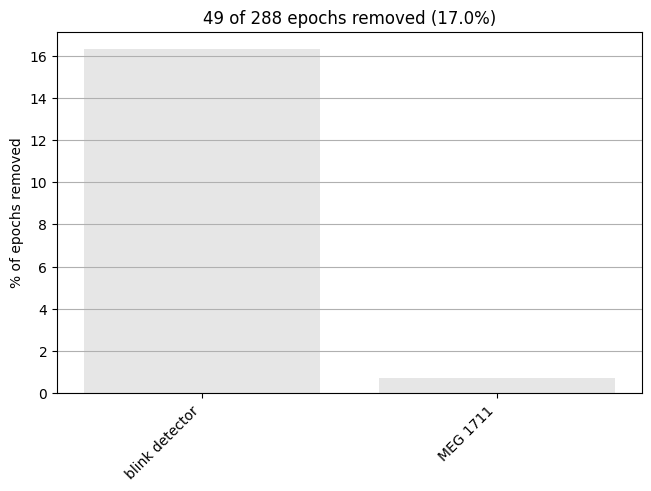

In [46]:
fig = epochs.plot_drop_log()



Pour accéder aux données de certaines époques, utilisez la méthode [`get_data()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.get_data).



In [47]:
epochs_data = epochs.get_data()
type(epochs_data), epochs_data.shape


(numpy.ndarray, (239, 306, 106))


`epochs_data` est un tableau 3D de dimension n_epochs x n_channels x n_time_points

### Visualisation des Époques

Voir [cette page](https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html) pour les options sur la façon de visualiser les époques.  
L'objet `Epochs` peut être visualisé (et parcouru de manière interactive) en utilisant sa méthode [`plot()`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot)




In [48]:
%matplotlib qt


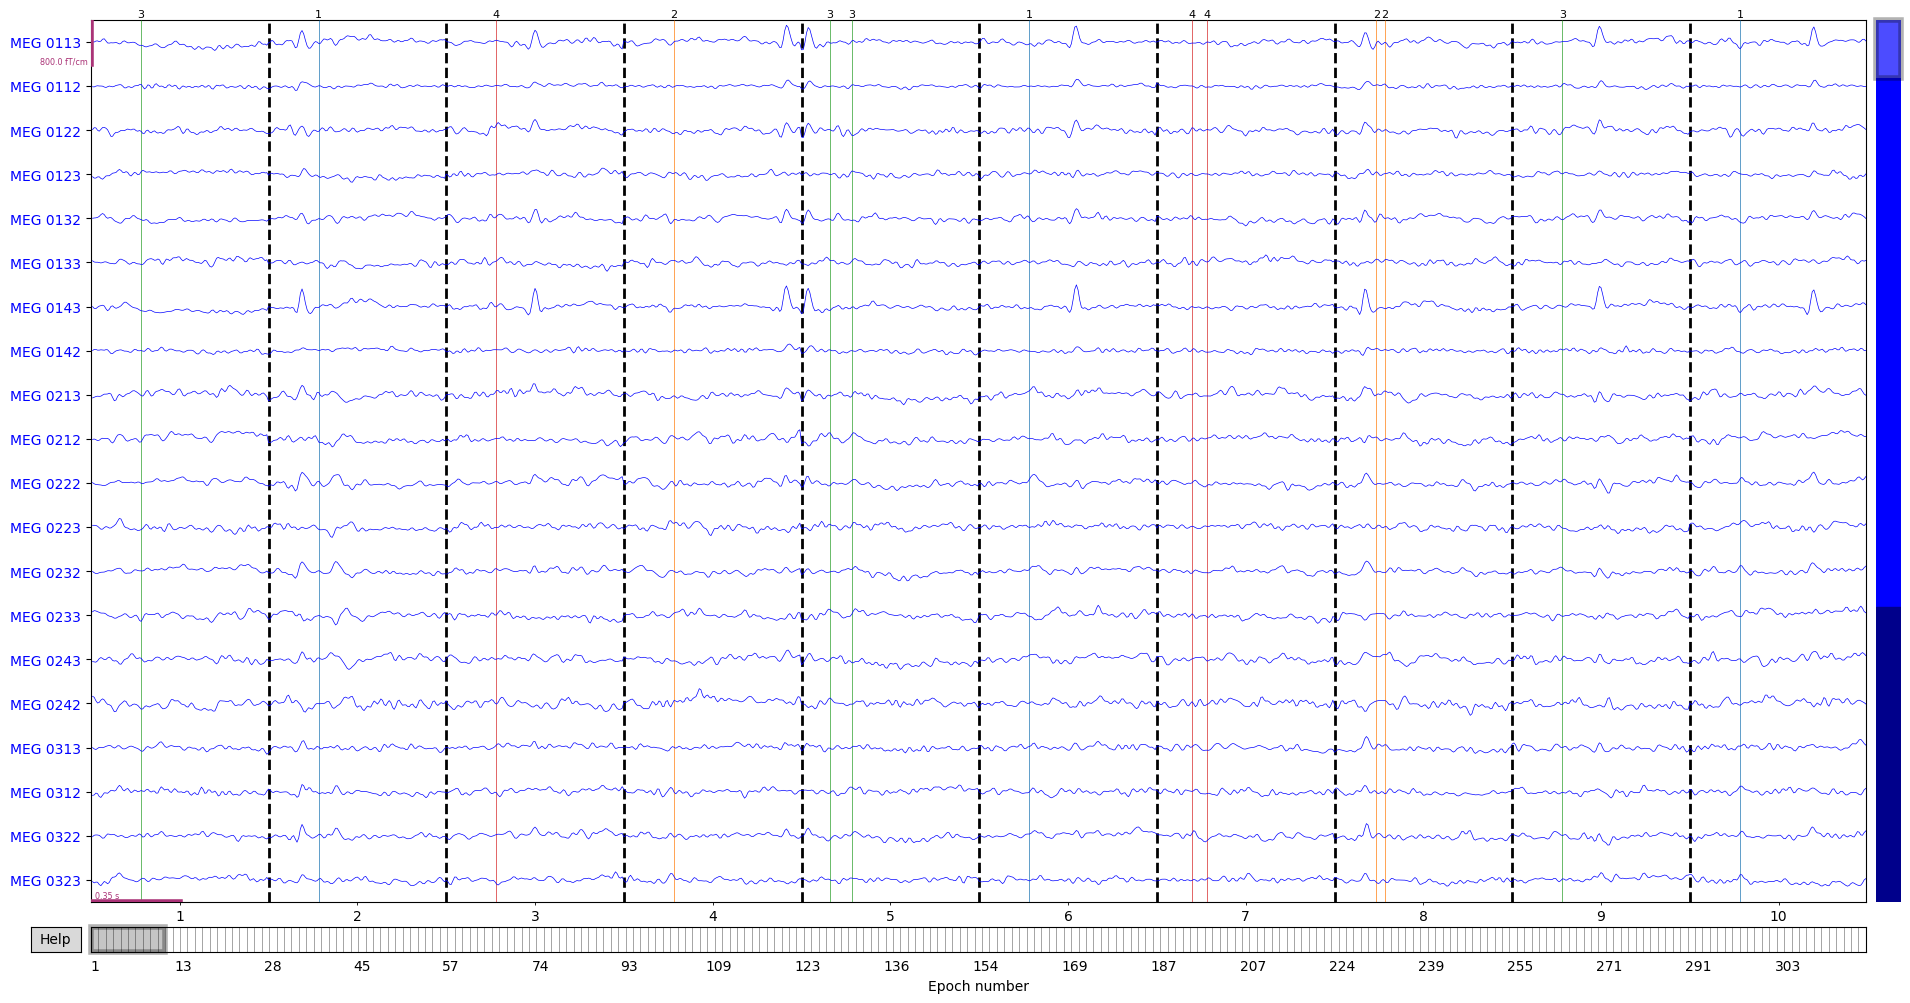

In [49]:
epochs.plot(n_epochs=10, events=True)



Dans le graphique ci-dessus, on peut voir voir des artefacts de battements cardiaques dans les canaux magnétomètres, donc avant de continuer, chargeons les projecteurs ECG à partir du disque et appliquons-les aux données :



In [50]:
ecg_proj_file = data_path / "MEG" / "sample" / "sample_audvis_ecg-proj.fif"
ecg_projs = mne.read_proj(ecg_proj_file)
epochs.add_proj(ecg_projs)
epochs.apply_proj()


<Epochs | 239 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~62.4 MiB, data loaded,
 'auditory/left': 55
 'auditory/right': 61
 'visual/left': 67
 'visual/right': 56>


Une façon pratique de visualiser de nombreuses époques simultanément est de les tracer sous forme de carte d'image, chaque ligne de pixels dans l'image représentant une seule époque, l'axe horizontal représentant le temps, et la couleur de chaque pixel représentant la valeur du signal à cet échantillon temporel pour cette époque.



In [51]:
figs = epochs['auditory'].plot_image(combine='mean')



Il est également possible de tracer des estimations de puissance spectrale sur les capteurs en tant que topographie du scalp



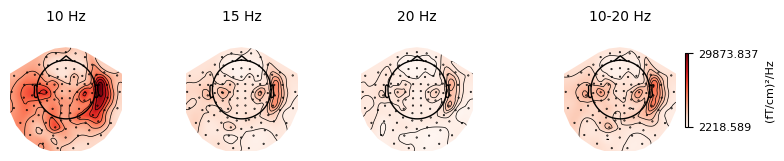

In [52]:
spectrum = epochs["visual/right"].compute_psd()
bands = {"10 Hz": 10, "15 Hz": 15, "20 Hz": 20, "10-20 Hz": (10, 20)}
spectrum.plot_topomap(bands=bands, vlim="joint", ch_type="grad")



## Moyenne des époques pour obtenir la réponse évoquée (ERF/ERP)

Les objets [`Evoked`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked) stockent généralement des signaux M/EEG qui ont été moyennés sur plusieurs époques, ce qui est une technique courante pour estimer l'activité évoquée par les stimuli. Les données dans un objet `Evoked` sont stockées dans un tableau de forme `(n_channels, n_times)`.  
Nous avons déjà l'objet `Epochs`, donc nous pouvons simplement utiliser sa méthode `average` :



In [53]:
evoked = epochs.average()
print(evoked)


<Evoked | '0.23 × auditory/left + 0.26 × auditory/right + 0.28 × visual/left + 0.23 × visual/right' (average, N=239), -0.1998 – 0.49949 s, baseline -0.199795 – 0 s, 305 ch, ~3.5 MiB>



Les informations sur la période de référence des `Epochs` sont transférées aux objets `Evoked` dérivés pour maintenir la provenance lors du traitement de vos données :



In [54]:
print(f"Période de référence des Epochs : {epochs.baseline}")
print(f"Période de référence des Evoked : {evoked.baseline}")


Période de référence des Epochs : (-0.19979521315838786, 0.0)
Période de référence des Evoked : (-0.19979521315838786, 0.0)


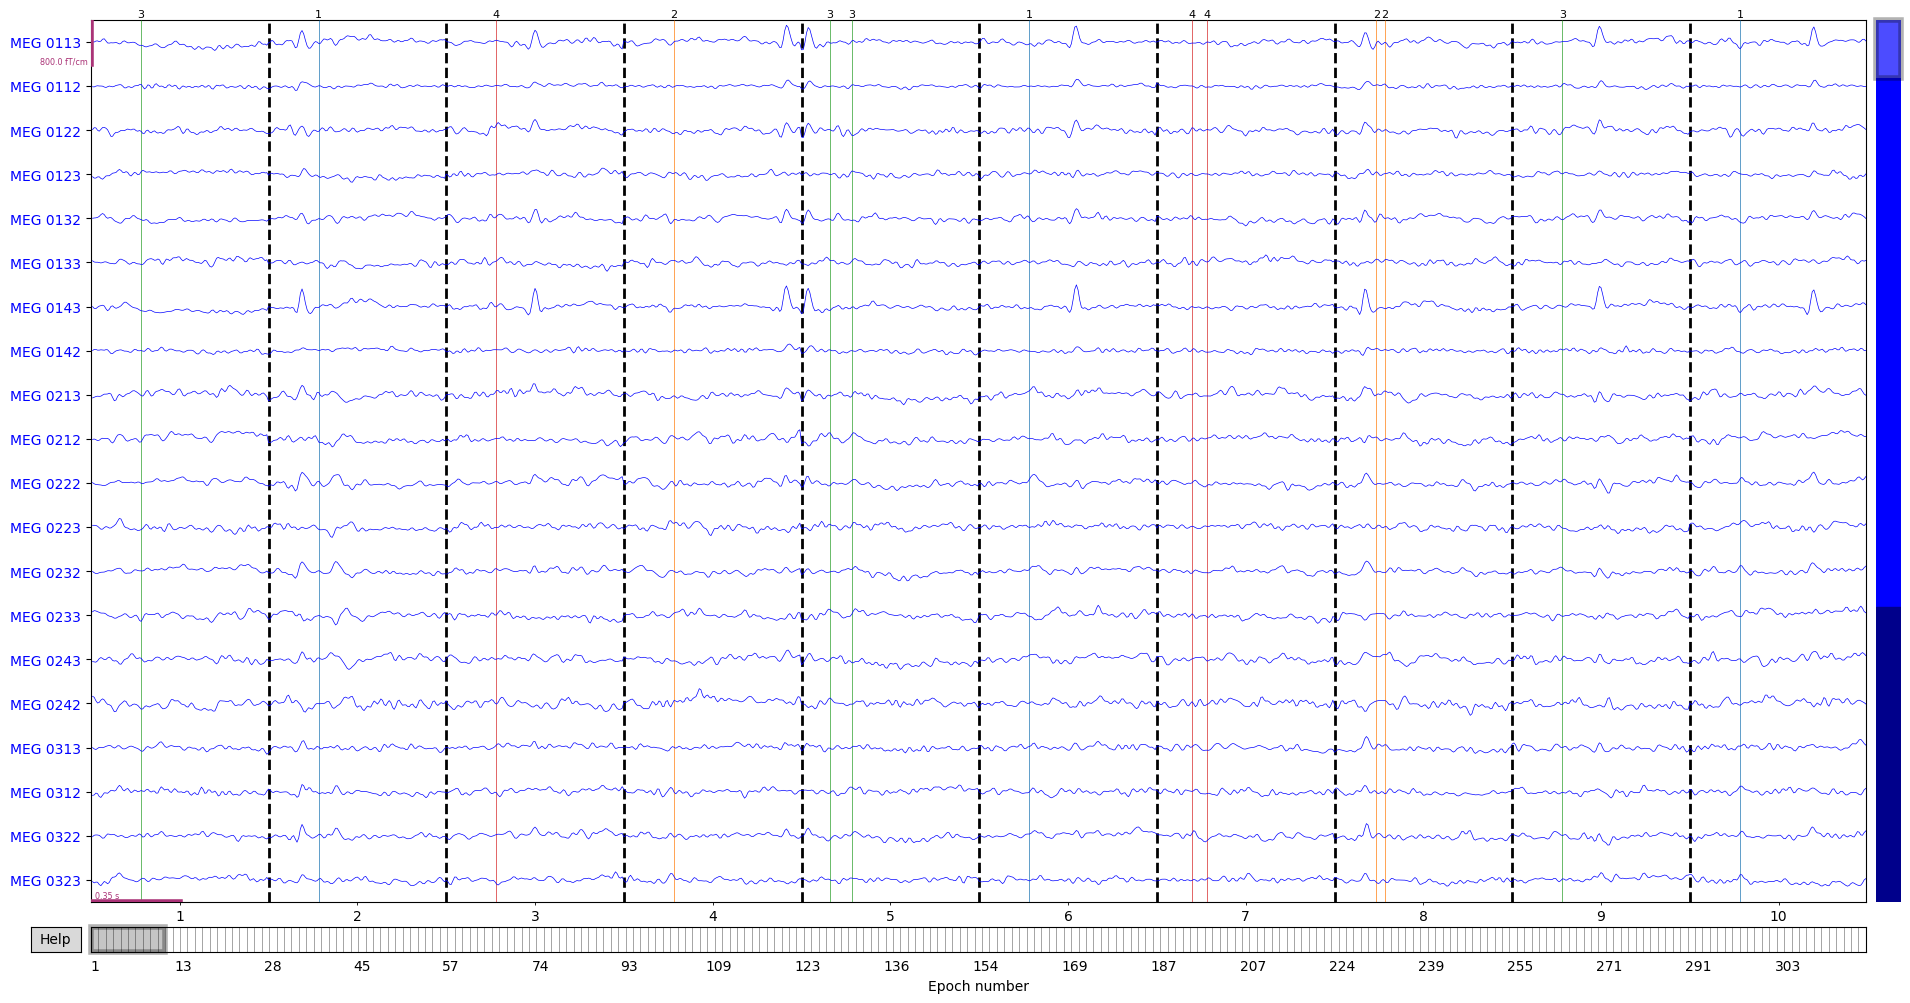

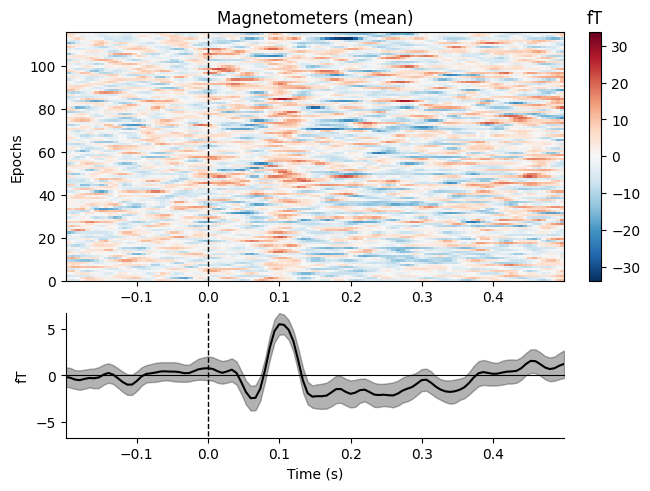

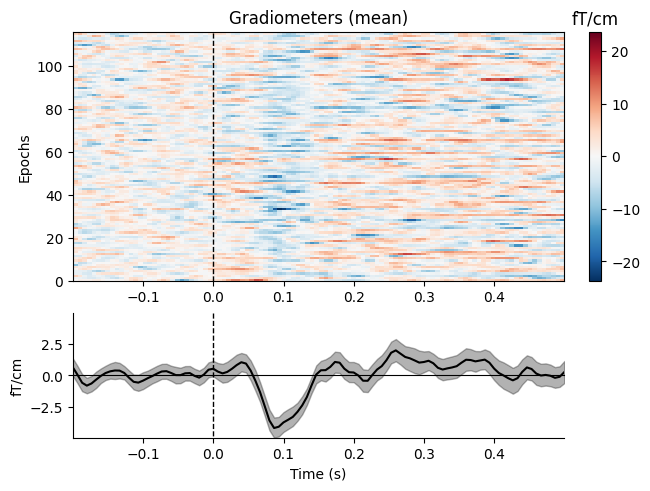

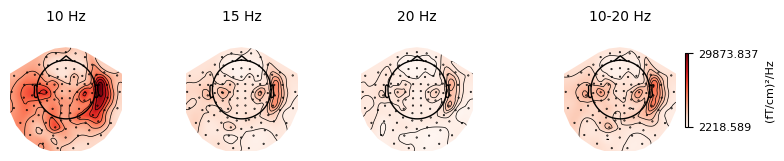

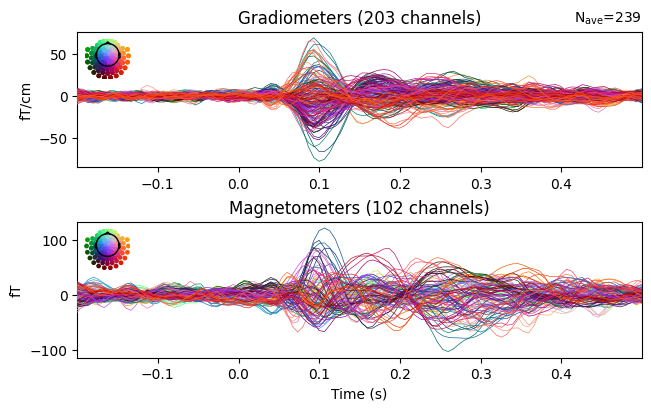

In [55]:
%matplotlib inline
fig = evoked.plot(spatial_colors=True)



Cela a créé une moyenne sur **toutes** les conditions. Estimons maintenant les réponses évoquées pour les conditions **individuelles**.



In [56]:
print(event_id)


{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4}


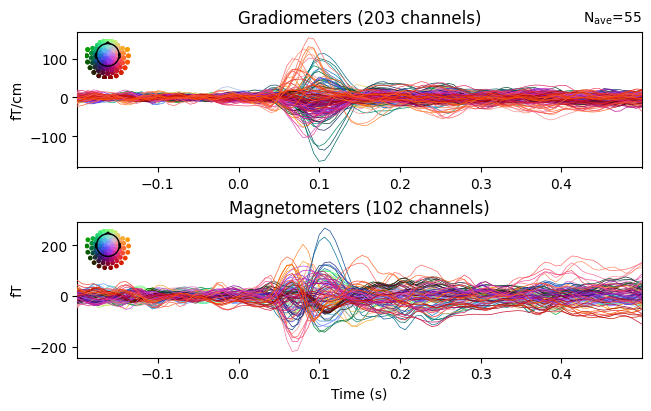

In [57]:
fig = epochs['auditory/left'].average().plot(spatial_colors=True)



Les méthodes `plot()` pour les objets [`Raw`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot), [`Epochs`](https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.plot) et [`Evoked`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot) ont de nombreux paramètres pour personnaliser la sortie du tracé, comme le codage couleur des traces de canaux par emplacement sur le scalp, ou le tracé de la puissance du champ global à côté des traces de canaux.

## Accès et indexation des époques par condition

Les époques peuvent être indexées par des entiers ou des tranches pour sélectionner un sous-ensemble d'époques, mais aussi avec des chaînes de caractères pour sélectionner par conditions `epochs[condition]`

Rappelez-vous que `/` sert d'opérateur de regroupement. Pour calculer la réponse évoquée sur **toutes** les stimulations "left", faites ce qui suit :



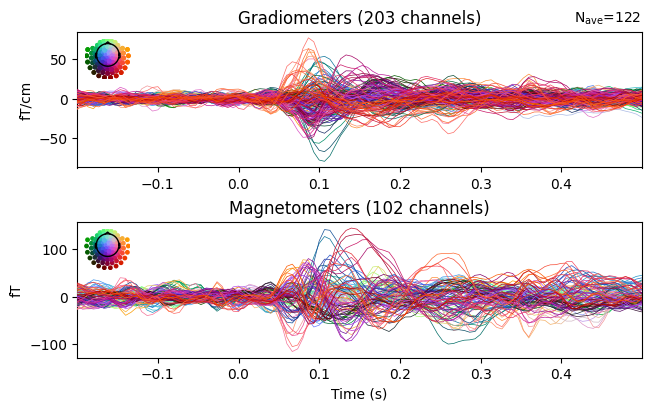

In [58]:
fig = epochs['left'].average().plot(spatial_colors=True);  # notez la légende


In [59]:
# rappelez-vous ...
event_id


{'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3, 'visual/right': 4}

In [60]:
epochs[0]  # première époque


<Epochs | 1 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.5 MiB, data loaded,
 'visual/left': 1>

In [61]:
epochs[:10]  # 10 premières époques


<Epochs | 10 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~5.7 MiB, data loaded,
 'auditory/left': 3
 'auditory/right': 2
 'visual/left': 3
 'visual/right': 2>

In [62]:
epochs['visual/left']  # époques pour la condition visuelle gauche


<Epochs | 67 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~19.8 MiB, data loaded,
 'visual/left': 67>

In [63]:
epochs['visual']  # époques pour la condition visuelle (gauche ou droite)


<Epochs | 123 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~33.7 MiB, data loaded,
 'visual/left': 67
 'visual/right': 56>

In [64]:
epochs['left']


<Epochs | 122 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~33.4 MiB, data loaded,
 'auditory/left': 55
 'visual/left': 67>


Dans event_id, `/` permet de selectionner les conditions de manière hiérarchique, par ex. ici, "auditory" vs. "visual", "left" vs. "right", et MNE peut les sélectionner individuellement.



In [65]:
%matplotlib qt


In [66]:
evoked_auditory_left = epochs['auditory/left'].average().pick_types(meg='grad')
evoked_auditory_left.crop(None, 0.2) # Début de l'évoqué jusqu'à 0,2s après le début du stimulus.
fig = evoked_auditory_left.plot(spatial_colors=True)
fig = evoked_auditory_left.plot(spatial_colors=True, gfp=True)



Dans la session interactive, les tracés en papillon vus ci-dessus peuvent être cliqués-glissés pour sélectionner une région temporelle, ce qui fera apparaître une carte de la distribution moyenne du champ sur le scalp pour la période de temps sélectionnée.

## Visualiser les Topographies

Les topographies du scalp à des moments spécifiques ou sur des périodes de temps peuvent également être générées en utilisant la méthode [`plot_topomap()`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap)



In [67]:
fig = evoked.plot_topomap(ch_type='mag', times=[0.05, 0.1, 0.15])
fig = evoked.plot_topomap(ch_type='grad', times=[0.05, 0.1, 0.15])


In [68]:
import numpy as np

times = np.linspace(0.05, 0.15, 5)
for ch_type in ('mag', 'grad'):
    fig = evoked.plot_topomap(times=times, ch_type=ch_type)



Il est également possible de passer différentes durées temporelles pour moyenner pour chaque point temporel. Passer la valeur None désactivera la moyenne pour ce point temporel :



In [69]:
averaging_durations = [0.01, 0.02, 0.03, None, None]
fig = evoked.plot_topomap(
    ch_type="mag", times=times, average=averaging_durations
)



[`plot_joint()`](https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_joint) combine les tracés en papillon avec les topographies du scalp, et fournit un excellent premier aperçu des données évoquées ; par défaut, les topographies seront automatiquement placées en fonction de la détection des pics.



In [70]:
figs = evoked.plot_joint()



Mais bien sûr, on peut également spécifier des points temporels personnalisés pour les topomaps.



In [71]:
figs = evoked.plot_joint(times=[0.1, 0.3])



Visualisons les topomaps pour toutes les conditions expérimentales.



In [72]:
for condition in event_id:
    fig = epochs[condition].average().plot_topomap(times=[0.1, 0.15])



### Calculer un contraste

La fonction [`combine_evoked()`](https://mne.tools/stable/generated/mne.combine_evoked.html#mne.combine_evoked) calcule une somme pondérée des objets `Evoked` qui lui sont donnés. Notez que cela combine les évoqués en tenant compte du nombre d'époques moyennées (pour mettre à l'échelle la variance du bruit)



In [73]:
evoked_left = epochs['auditory/left'].average()
evoked_right = epochs['auditory/right'].average()

evoked_contrast = mne.combine_evoked([evoked_left, evoked_right], weights=[1, -1])


In [74]:
fig = evoked_left.plot()
fig = evoked_right.plot()
fig = evoked_contrast.plot()



Tracer quelques topographies :



In [75]:
vmin, vmax = -4, 4  # Plage de la barre de couleur
fig = evoked_left.plot_topomap(ch_type='grad')
fig = evoked_right.plot_topomap(ch_type='grad')
fig = evoked_contrast.plot_topomap(ch_type='grad')


/home/hyruuk/GitHub/cocolab/mne_meeg_ml_main/env/lib/python3.10/site-packages/mne/viz/_mpl_figure.py:2355: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(FigureClass=FigureClass, **kwargs)



### EXERCICE
- Extraire des Époques limitées aux magnétomètres sur des données non filtrées (`sample_audvis_raw.fif`)
- Tracer la différence entre toutes les présentations de stimulus *visuel* et toutes les présentations de stimulus *auditif*
- Recalculer tout pour l'EEG

<div class="alert alert-block alert-info">
<b>Note :</b> Pour plus de détails, consultez les tutoriels suivants : <br>
    <a href="https://mne.tools/stable/auto_tutorials/raw/index.html" target="_blank">Travailler avec des données continues</a> <br>
    <a href="https://mne.tools/stable/auto_tutorials/epochs/index.html" target="_blank">Segmenter des données continues en époques</a> <br>
    <a href="https://mne.tools/stable/auto_tutorials/evoked/index.html" target="_blank">Estimer des réponses évoquées</a>
</div>

